# **Clustering - Iris Dataset**

In [23]:
from sklearn.datasets import load_iris
import pandas as pd

In [24]:
iris_dataset = load_iris()
df = pd.DataFrame(iris_dataset.data, columns = iris_dataset.feature_names)

In [25]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [26]:
len(df)

150

In [27]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [28]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df)
df = pd.DataFrame(scaler.transform(df), columns = df.columns)

In [29]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.440556,0.467458,0.458056
std,0.230018,0.181611,0.299203,0.317599
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.567797,0.500000
75%,0.583333,0.541667,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


In [30]:
df_petal = df[["petal length (cm)", "petal width (cm)"]]
df_sepal = df[["sepal length (cm)", "sepal width (cm)"]]

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
df_petal.iloc[1:3]

,petal length (cm),petal width (cm)
1,0.067797,0.041667
2,0.050847,0.041667


Text(0.5, 1.0, 'petal - length vs width')

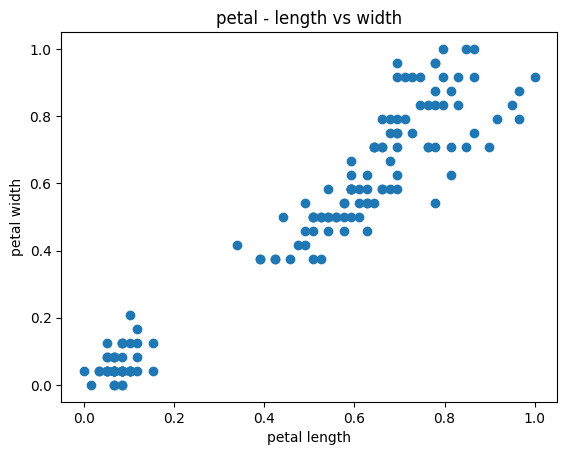

In [40]:
plt.scatter(df_petal.iloc[:, 0], df_petal.iloc[:, 1])
plt.xlabel("petal length")
plt.ylabel("petal width")
plt.title("petal - length vs width")

In [41]:
from sklearn.cluster import KMeans

In [42]:
model = KMeans(n_clusters = 2)
y = model.fit_predict(df_petal.values)
y

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [43]:
df_petal["cluster"] = y

<ipython-input-43-da685bf7b9ce>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_petal["cluster"] = y


In [46]:
pd.concat([df_petal.head(), df_petal.tail()], axis = "rows")

,petal length (cm),petal width (cm),cluster
0,0.067797,0.041667,0
1,0.067797,0.041667,0
2,0.050847,0.041667,0
3,0.084746,0.041667,0
4,0.067797,0.041667,0
145,0.711864,0.916667,1
146,0.677966,0.750000,1
147,0.711864,0.791667,1
148,0.745763,0.916667,1
149,0.694915,0.708333,1


In [54]:
centers = model.cluster_centers_
centers

array([[0.07830508, 0.06083333],
       [0.6620339 , 0.65666667]])

Text(0.5, 1.0, 'petal - clusters')

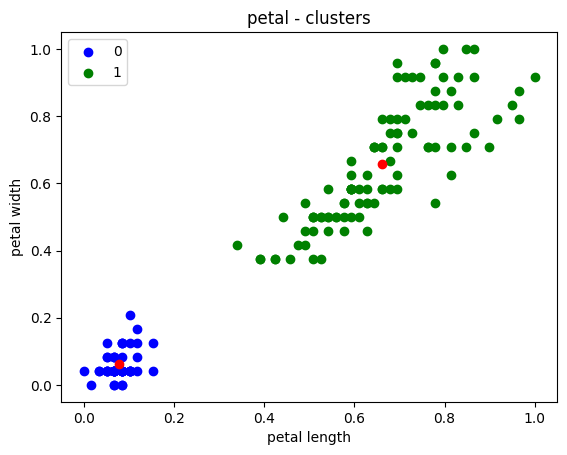

In [55]:
df_petal_0 = df_petal[df_petal.cluster == 0]
df_petal_1 = df_petal[df_petal.cluster == 1]

plt.scatter(df_petal_0.iloc[:, 0], df_petal_0.iloc[:, 1], color = "blue", label = '0')
plt.scatter(df_petal_1.iloc[:, 0], df_petal_1.iloc[:, 1], color = "green", label = '1')

# cluster centers
plt.scatter(centers[:, 0], centers[:, 1], color = "red")

plt.xlabel("petal length")
plt.ylabel("petal width")
plt.legend()
plt.title("petal - clusters")

In [58]:
ssm = []

for n in range(10):
  model = KMeans(n_clusters = n + 1)
  model.fit(df_petal.drop("cluster", axis = "columns", inplace = False).values)
  ssm.append(model.inertia_)

ssm

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[28.368353219727197,
 5.176463590044368,
 1.701874688192097,
 1.1615234094205573,
 0.8538617353912241,
 0.6800800986587507,
 0.5658013138564928,
 0.4880262556573533,
 0.4178714129819895,
 0.3642226800793791]

Text(0.5, 1.0, "Elbow Method To Find The Best Value Of 'n_clusters'")

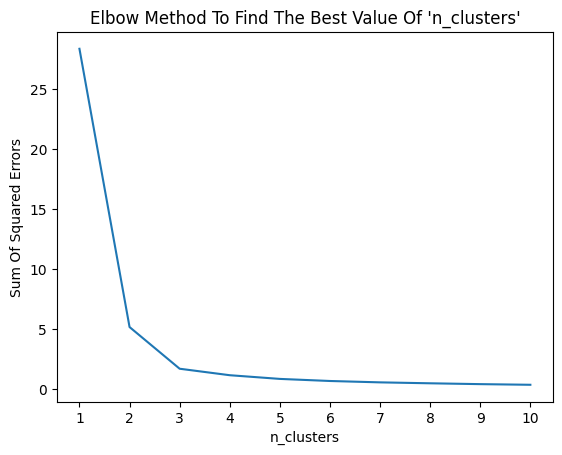

In [67]:
#plt.plot([i + 1 for i in range(10)], ssm)
plt.plot(ssm)
plt.xticks(labels = [i + 1 for i in range(10)], ticks = [i for i in range(10)])
plt.xlabel("n_clusters")
plt.ylabel("Sum Of Squared Errors")
plt.title("Elbow Method To Find The Best Value Of 'n_clusters'")

**By looking at the plot above, it can be concluded that the best value of `n_clusters` is 3**

In [ ]:
df_petal.drop("cluster", axis = "columns", inplace = True)

In [71]:
model = KMeans(n_clusters = 3)
y = model.fit_predict(df_petal.values)
y

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [78]:
df_petal["cluster"] = y

<ipython-input-78-da685bf7b9ce>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_petal["cluster"] = y


In [79]:
df_petal.head()

,petal length (cm),petal width (cm),cluster
0,0.067797,0.041667,1
1,0.067797,0.041667,1
2,0.050847,0.041667,1
3,0.084746,0.041667,1
4,0.067797,0.041667,1


In [74]:
centers = model.cluster_centers_
centers

array([[0.7740113 , 0.81510417],
       [0.07830508, 0.06083333],
       [0.55867014, 0.51041667]])

Text(0.5, 1.0, 'petal - clusters')

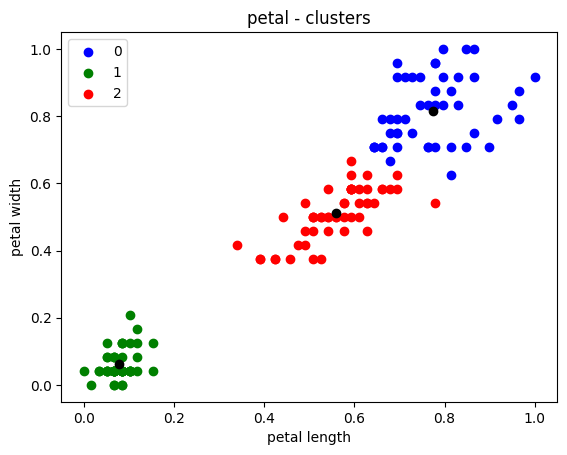

In [80]:
df_petal_0 = df_petal[df_petal.cluster == 0]
df_petal_1 = df_petal[df_petal.cluster == 1]
df_petal_2 = df_petal[df_petal.cluster == 2]

plt.scatter(df_petal_0.iloc[:, 0], df_petal_0.iloc[:, 1], color = "blue", label = '0')
plt.scatter(df_petal_1.iloc[:, 0], df_petal_1.iloc[:, 1], color = "green", label = '1')
plt.scatter(df_petal_2.iloc[:, 0], df_petal_2.iloc[:, 1], color = "red", label = '2')

# cluster centers
plt.scatter(centers[:, 0], centers[:, 1], color = "black")

plt.xlabel("petal length")
plt.ylabel("petal width")
plt.legend()
plt.title("petal - clusters")